In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Libraries for dataframe management
import pandas as pd
import string 

#NLTK Libraries for lyrics processing/cleaning
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import re 
import os

#Textblob for Sentiment Analysis
from textblob import TextBlob

#NLTK VADER Sentiment Intensity Analyser for Sentiment Anlaysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer


#Downloads for vocabulary
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

#function to clean lyrics by removing redudant words. Pass in dataframe and column to clean ("lyrics")
def tokenise(corpus):
  filtered_sentence = [] 
  #corpus = corpus.lower()
  word_tokens = tokenizer.tokenize(corpus) 
  filtered_sentence = ' '.join([w for w in word_tokens if not w in stop_words])
  # comb = ' '.join([lemmatizer.lemmatize(w) for w in filtered_sentence]) 
  return filtered_sentence

#regex to remove standard fillers like "Verse" 
def stripped_lyrics(df, column):
    df = df
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace(r"verse |[1|2|3]|chorus|bridge|outro","").str.replace("[","").str.replace("]","")
    df[column] = df[column].str.lower().str.replace(r"instrumental|intro|guitar|solo","")
    df[column] = df[column].str.replace("\n"," ").str.replace(r"[^\w\d'\s]+","").str.replace("efil ym fo flah","")
    df[column] = df[column].str.strip()
    df[column]
    return df

#clean processed lyrics to just unique words of each song. Pass in text to clean into unique words.
def words_lyrics(document):
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

#create list of unique items
def unique(lists):
    unique_list =[]
    for x in lists:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

#convert list to string for processing
def listToString(s): 
    str1 = " " 
    return (','.join(map(str, s)))

#function to create "year ranges" for over time analysis
def create_decades(df):
    ranges = []
    decades = []
    df['date'].fillna(0)
    df['date'] = df['date'].astype("str")
    for i in df.index:
        years.append(df['date'].str.split("-")[i][0])
    df['year'] = year
    df['year'] = df['year'].astype("int")

    for year in df['year']:
        if 1930 <= year < 1940:
            decades.append("1930s")
        if 1940 <= year < 1950:
            decades.append("1940s")
        if 1950 <= year < 1960:
            decades.append("1950s")
        if 1960 <= year < 1970:
            decades.append("1960s")
        if 1970 <= year < 1980:
            decades.append("1970s")
        if 1980 <= year < 1990:
            decades.append("1980s")
        if 1990 <= year < 2000:
            decades.append("1990s")
        if 2000 <= year < 2010:
            decades.append("2000s")
        if 2010 <= year :
            decades.append("2010s")
    df['decade'] = decades
    df = df[['artist','title','album','decade','year','date','lyric']]
    return df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import string

#to plot the graphs
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#import functions from functions_def.py 
# from ipynb.fs.full.functions_def import *

#library used to count the frequency of words
from sklearn.feature_extraction.text import CountVectorizer

#read lyrics file into dataframe for processing.
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Song_data_prep (1).csv")

In [ ]:
#correction of 2 mistyped labels
df = df[0:10001]
df['sentiment'][4211] = "neutral"
df['sentiment'][4212] = "neutral"
x = list(df['lyrics_processed'])
y = list(df['sentiment'])
y[4211] = y[4210]
y[4212] = y[4210]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
x_neutral_df = []
y_neutral_df = []
x_positive_df = []
y_positive_df = []
x_negative_df = []
y_negative_df = []
x_test_df = []
y_test_df = []
for i in range(len(y)):
  if (y[i] == 1):
    x_neutral_df.append(df.lyrics_processed[i])
    y_neutral_df.append(y[i])
  elif y[i] == 2:
    x_positive_df.append(df.lyrics_processed[i])
    y_positive_df.append(y[i])
  elif y[i] == 3:
    x_negative_df.append(df.lyrics_processed[i])
    y_negative_df.append(y[i])
  elif y[i] == 0:
    x_test_df.append(df.lyrics_processed[i])
    y_test_df.append(y[i])

In [ ]:
x_df = x_negative_df + x_neutral_df + x_positive_df
y_df = y_negative_df + y_neutral_df + y_positive_df

In [ ]:
senti = {'positive': 2,'neutral': 1,'negative':3, 'nan': 0}
for item in range(len(y)):
  try:
    y[item] = senti[str(y[item])] 
  except:
    print(item)

In [ ]:
# x_df[0]

In [ ]:
# df_final = pd.DataFrame()
df_final = df

In [ ]:
# For analysis of sentiment over decades in across all artists
# created column to strip just year, and additional column to define range of time (decade)
import pandas as pd
df_final['date'] = pd.to_datetime(df_final['date'], errors='coerce')
df_final['year'] = df_final['date'].dt.year
decades = []
for year in df['year']:
        if 1930 <= year < 1940:
            decades.append("1930s")
        if 1940 <= year < 1950:
            decades.append("1940s")
        if 1950 <= year < 1960:
            decades.append("1950s")
        if 1960 <= year < 1970:
            decades.append("1960s")
        if 1970 <= year < 1980:
            decades.append("1970s")
        if 1980 <= year < 1990:
            decades.append("1980s")
        if 1990 <= year < 2000:
            decades.append("1990s")
        if 2000 <= year < 2010:
            decades.append("2000s")
        if 2010 <= year :
            decades.append("2010s")
df_final["decade"] = pd.Series(decades)

# Further cleaning lyrics to remove all redundant words.

# # Using list format (Rohan)
# new_lyrics =[]
# for i in range(len(x_df)):
#     temp = tokenise(x_df[i])
#     new_lyrics.append(temp)
# #     print (tokens)
# df_final['new'] = new_lyrics
# df_final.head()

# Using dataframe approach
new_lyrics =[]
for i in df_final.index:
    tokens = tokenise(df_final['lyrics_processed'].iloc[i])
    new_lyrics.append(tokens)
    # print (tokens)
df_final['new'] = new_lyrics
df_final.head()

,Unnamed: 0,Unnamed,artist,song_name,lyrics_processed,link,date,sentiment,Description,Featured Artist,genre,lyrics,explicit_rating,Unnamed: 13,Unnamed: 14,Unnamed: 15,year,decade,new
0,0.0,0.0,Adele,Hello,hello it's me i was wondering if after all the...,http://www.youtube.com/watch?v=YQHsXMglC9A,2015-10-23,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,"[Verse 1]\nHello, it's me\nI was wondering if ...",0.0,NaN,NaN,NaN,2015.0,2010s,hello wondering years like meet go everything ...
1,1.0,1.0,Adele,Someone Like You,i heard that you're settled down that you foun...,http://www.youtube.com/watch?v=hLQl3WQQoQ0,2011-01-24,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nI heard that you're settled down\nT...,0.0,NaN,NaN,NaN,2011.0,2010s,heard settled found girl married heard dreams ...
2,2.0,2.0,Adele,When We Were Young,everybody loves the things you do from the way...,http://www.youtube.com/watch?v=WyVS2N8aK-U,2015-11-20,neutral,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nEverybody loves the things you do\n...,0.0,NaN,NaN,NaN,2015.0,2010s,everybody loves things way talk way move every...
3,3.0,3.0,Adele,All I Ask,i will leave my heart at the door i won't say ...,http://www.youtube.com/watch?v=GcHVHPPWkvI,2015-11-20,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nI will leave my heart at the door\n...,0.0,NaN,NaN,NaN,2015.0,2010s,leave heart door say word said know play prete...
4,4.0,4.0,Adele,Rolling in the Deep,there's a fire starting in my heart reaching a...,http://www.youtube.com/watch?v=rYEDA3JcQqw,2010-11-29,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nThere's a fire starting in my heart...,1.0,NaN,NaN,NaN,2010.0,2010s,fire starting heart reaching fever pitch bring...


In [ ]:
df_final.head()

,Unnamed: 0,Unnamed,artist,song_name,lyrics_processed,link,date,sentiment,Description,Featured Artist,genre,lyrics,explicit_rating,Unnamed: 13,Unnamed: 14,Unnamed: 15,year,decade,new
0,0.0,0.0,Adele,Hello,hello it's me i was wondering if after all the...,http://www.youtube.com/watch?v=YQHsXMglC9A,2015-10-23,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,"[Verse 1]\nHello, it's me\nI was wondering if ...",0.0,NaN,NaN,NaN,2015.0,2010s,hello wondering years like meet go everything ...
1,1.0,1.0,Adele,Someone Like You,i heard that you're settled down that you foun...,http://www.youtube.com/watch?v=hLQl3WQQoQ0,2011-01-24,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nI heard that you're settled down\nT...,0.0,NaN,NaN,NaN,2011.0,2010s,heard settled found girl married heard dreams ...
2,2.0,2.0,Adele,When We Were Young,everybody loves the things you do from the way...,http://www.youtube.com/watch?v=WyVS2N8aK-U,2015-11-20,neutral,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nEverybody loves the things you do\n...,0.0,NaN,NaN,NaN,2015.0,2010s,everybody loves things way talk way move every...
3,3.0,3.0,Adele,All I Ask,i will leave my heart at the door i won't say ...,http://www.youtube.com/watch?v=GcHVHPPWkvI,2015-11-20,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nI will leave my heart at the door\n...,0.0,NaN,NaN,NaN,2015.0,2010s,leave heart door say word said know play prete...
4,4.0,4.0,Adele,Rolling in the Deep,there's a fire starting in my heart reaching a...,http://www.youtube.com/watch?v=rYEDA3JcQqw,2010-11-29,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nThere's a fire starting in my heart...,1.0,NaN,NaN,NaN,2010.0,2010s,fire starting heart reaching fever pitch bring...


In [ ]:
# # remove unwanted unnamed columns.
del df_final["Unnamed"]
del df_final["Unnamed: 0"]
del df_final["Unnamed: 13"]
del df_final["Unnamed: 14"]
del df_final["Unnamed: 15"]

In [ ]:
df_final.head()


,artist,song_name,lyrics_processed,link,date,sentiment,Description,Featured Artist,genre,lyrics,explicit_rating,year,decade,new
0,Adele,Hello,hello it's me i was wondering if after all the...,http://www.youtube.com/watch?v=YQHsXMglC9A,2015-10-23,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,"[Verse 1]\nHello, it's me\nI was wondering if ...",0.0,2015.0,2010s,hello wondering years like meet go everything ...
1,Adele,Someone Like You,i heard that you're settled down that you foun...,http://www.youtube.com/watch?v=hLQl3WQQoQ0,2011-01-24,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nI heard that you're settled down\nT...,0.0,2011.0,2010s,heard settled found girl married heard dreams ...
2,Adele,When We Were Young,everybody loves the things you do from the way...,http://www.youtube.com/watch?v=WyVS2N8aK-U,2015-11-20,neutral,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nEverybody loves the things you do\n...,0.0,2015.0,2010s,everybody loves things way talk way move every...
3,Adele,All I Ask,i will leave my heart at the door i won't say ...,http://www.youtube.com/watch?v=GcHVHPPWkvI,2015-11-20,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nI will leave my heart at the door\n...,0.0,2015.0,2010s,leave heart door say word said know play prete...
4,Adele,Rolling in the Deep,there's a fire starting in my heart reaching a...,http://www.youtube.com/watch?v=rYEDA3JcQqw,2010-11-29,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nThere's a fire starting in my heart...,1.0,2010.0,2010s,fire starting heart reaching fever pitch bring...


In [ ]:
#Correction of 2 mislabelled entries during manual labelling of sentiment
df['sentiment'][4211] = "neutral"
#print (df['sentiment'][4211])

df['sentiment'][4212] = "neutral"
#print (df['sentiment'][4212])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_final.head()

,artist,song_name,lyrics_processed,link,date,sentiment,Description,Featured Artist,genre,lyrics,explicit_rating,year,decade,new
0,Adele,Hello,hello it's me i was wondering if after all the...,http://www.youtube.com/watch?v=YQHsXMglC9A,2015-10-23,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,"[Verse 1]\nHello, it's me\nI was wondering if ...",0.0,2015.0,2010s,hello wondering years like meet go everything ...
1,Adele,Someone Like You,i heard that you're settled down that you foun...,http://www.youtube.com/watch?v=hLQl3WQQoQ0,2011-01-24,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nI heard that you're settled down\nT...,0.0,2011.0,2010s,heard settled found girl married heard dreams ...
2,Adele,When We Were Young,everybody loves the things you do from the way...,http://www.youtube.com/watch?v=WyVS2N8aK-U,2015-11-20,neutral,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nEverybody loves the things you do\n...,0.0,2015.0,2010s,everybody loves things way talk way move every...
3,Adele,All I Ask,i will leave my heart at the door i won't say ...,http://www.youtube.com/watch?v=GcHVHPPWkvI,2015-11-20,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nI will leave my heart at the door\n...,0.0,2015.0,2010s,leave heart door say word said know play prete...
4,Adele,Rolling in the Deep,there's a fire starting in my heart reaching a...,http://www.youtube.com/watch?v=rYEDA3JcQqw,2010-11-29,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nThere's a fire starting in my heart...,1.0,2010.0,2010s,fire starting heart reaching fever pitch bring...


In [ ]:
#Function to run SA through Textblob
def sentiment_blob(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [ ]:
# Applying Textblob on final processed lyrics
df_final['blob'] = df_final['new'].apply(sentiment_blob)

#seperating blob list into polarity and subjectivity.
df3 = df_final.blob.apply(pd.Series)
df3.columns = ['polarity', 'subjectivity']
df_final ['polarity'] = df3['polarity']
df_final['subjectivity'] = df3['subjectivity']

# Computing final score for Textblob
# Subjectivity : 0 is very objective, 1 is very subjective
#Polarity : [-1:1] , -1 is negative, +1 is positive, 0 is neutral (no match with training set)
finalscore_blob = []
for i in range(len(df_final)):
  if df_final['polarity'][i]>0:
    finalscore_blob.append('positive')
  elif df_final['polarity'][i]<=0:
    finalscore_blob.append('negative')
  # elif df_final['polarity'][i] == 0:
  #   finalscore_blob.append('neutral')

df_final['blob_score'] = finalscore_blob
# df_final.head(10)


In [ ]:
df_final.head()

,artist,song_name,lyrics_processed,link,date,sentiment,Description,Featured Artist,genre,lyrics,explicit_rating,year,decade,new,blob,polarity,subjectivity,blob_score
0,Adele,Hello,hello it's me i was wondering if after all the...,http://www.youtube.com/watch?v=YQHsXMglC9A,2015-10-23,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,"[Verse 1]\nHello, it's me\nI was wondering if ...",0.0,2015.0,2010s,hello wondering years like meet go everything ...,"(-0.17681159420289855, 0.5130434782608696)",-0.176812,0.513043,negative
1,Adele,Someone Like You,i heard that you're settled down that you foun...,http://www.youtube.com/watch?v=hLQl3WQQoQ0,2011-01-24,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nI heard that you're settled down\nT...,0.0,2011.0,2010s,heard settled found girl married heard dreams ...,"(0.28095238095238095, 0.4428571428571427)",0.280952,0.442857,positive
2,Adele,When We Were Young,everybody loves the things you do from the way...,http://www.youtube.com/watch?v=WyVS2N8aK-U,2015-11-20,neutral,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nEverybody loves the things you do\n...,0.0,2015.0,2010s,everybody loves things way talk way move every...,"(0.062037037037037064, 0.4178240740740741)",0.062037,0.417824,positive
3,Adele,All I Ask,i will leave my heart at the door i won't say ...,http://www.youtube.com/watch?v=GcHVHPPWkvI,2015-11-20,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nI will leave my heart at the door\n...,0.0,2015.0,2010s,leave heart door say word said know play prete...,"(-0.19642857142857142, 0.5206349206349206)",-0.196429,0.520635,negative
4,Adele,Rolling in the Deep,there's a fire starting in my heart reaching a...,http://www.youtube.com/watch?v=rYEDA3JcQqw,2010-11-29,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nThere's a fire starting in my heart...,1.0,2010.0,2010s,fire starting heart reaching fever pitch bring...,"(0.0859375, 0.4491319444444446)",0.085938,0.449132,positive


In [ ]:
# SA with VADER Sentiment Intensinty Model
# Create lists to store the different scores for each word
negative=[]
neutral = []
positive = []
compound = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

#Iterate for each row of lyrics and append the scores
for i in df_final.index:
    scores = sid.polarity_scores(df_final['new'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

#Create 4 columns to the main data frame  for each score 
df_final['negative'] = negative
df_final['neutral'] = neutral
df_final['positive'] = positive
df_final['compound'] = compound


# Final Label considering 3 categories : pos, neu and neg
finalscore = []
for i in range(len(df_final)):
  if df_final['neutral'][i]>0.625:
    finalscore.append('neutral')
  elif df_final['positive'][i] > df_final['negative'][i]:
    finalscore.append('positive')
  else:
    finalscore.append('negative')

df_final['SI Score'] = finalscore

# Final Label considering 2 categories : neu, non-neu
nltk_cat = []
for i in range(len(df_final)):
  if df_final['neutral'][i]>0.625:
    nltk_cat.append('neutral')
  else:
    nltk_cat.append('non-neutral')

df_final['NLTK Class'] = nltk_cat

#df_final.groupby('sentiment')['positive'].describe()

In [ ]:
df_final.head()

,artist,song_name,lyrics_processed,link,date,sentiment,Description,Featured Artist,genre,lyrics,explicit_rating,year,decade,new,blob,polarity,subjectivity,blob_score,negative,neutral,positive,compound,SI Score,NLTK Class
0,Adele,Hello,hello it's me i was wondering if after all the...,http://www.youtube.com/watch?v=YQHsXMglC9A,2015-10-23,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,"[Verse 1]\nHello, it's me\nI was wondering if ...",0.0,2015.0,2010s,hello wondering years like meet go everything ...,"(-0.17681159420289855, 0.5130434782608696)",-0.176812,0.513043,negative,0.185,0.712,0.103,-0.6808,neutral,neutral
1,Adele,Someone Like You,i heard that you're settled down that you foun...,http://www.youtube.com/watch?v=hLQl3WQQoQ0,2011-01-24,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nI heard that you're settled down\nT...,0.0,2011.0,2010s,heard settled found girl married heard dreams ...,"(0.28095238095238095, 0.4428571428571427)",0.280952,0.442857,positive,0.234,0.451,0.315,0.9574,positive,non-neutral
2,Adele,When We Were Young,everybody loves the things you do from the way...,http://www.youtube.com/watch?v=WyVS2N8aK-U,2015-11-20,neutral,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nEverybody loves the things you do\n...,0.0,2015.0,2010s,everybody loves things way talk way move every...,"(0.062037037037037064, 0.4178240740740741)",0.062037,0.417824,positive,0.144,0.538,0.318,0.9867,positive,non-neutral
3,Adele,All I Ask,i will leave my heart at the door i won't say ...,http://www.youtube.com/watch?v=GcHVHPPWkvI,2015-11-20,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nI will leave my heart at the door\n...,0.0,2015.0,2010s,leave heart door say word said know play prete...,"(-0.19642857142857142, 0.5206349206349206)",-0.196429,0.520635,negative,0.228,0.444,0.328,0.9062,positive,non-neutral
4,Adele,Rolling in the Deep,there's a fire starting in my heart reaching a...,http://www.youtube.com/watch?v=rYEDA3JcQqw,2010-11-29,negative,"In this digital and single-driven age, it’s ve...",NaN,Pop,[Verse 1]\nThere's a fire starting in my heart...,1.0,2010.0,2010s,fire starting heart reaching fever pitch bring...,"(0.0859375, 0.4491319444444446)",0.085938,0.449132,positive,0.177,0.542,0.280,0.9926,positive,non-neutral


Text(0.5, 1.0, 'Performance of TextBlob Model : Positive/Negative Polarity')

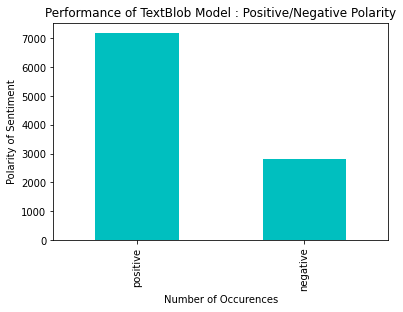

In [ ]:
#Performance of Textblob in classifying Positive/Negative Sentiment
df_final['blob_score'].value_counts().plot(kind='bar', color ='c')
plt.xlabel('Number of Occurences')
plt.ylabel('Polarity of Sentiment')
plt.title('Performance of TextBlob Model : Positive/Negative Polarity')

Text(0.5, 1.0, ' Polarity/Subjectivity of songs over time')

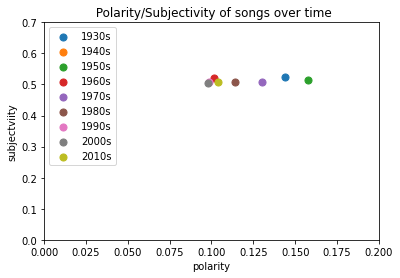

In [ ]:
#Performance of Textblob : Subjectivity vs Polarity / Scatter Plot
means_df = df_final.groupby(['decade']).mean()
for name, group in means_df.groupby(['decade']):
    plt.scatter(group['polarity'],group['subjectivity'],label=name, s=50)
plt.xlim([0,0.2]), 
plt.ylim([0,0.7])
plt.xlabel('polarity')
plt.ylabel('subjectviity')
plt.legend()
plt.title(' Polarity/Subjectivity of songs over time')

Text(0.5, 1.0, 'Trend for Polarity over time')

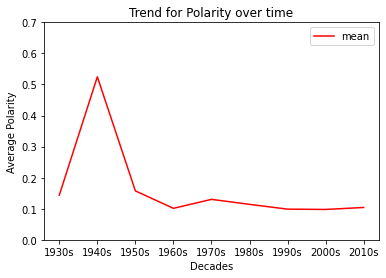

In [ ]:
#Polarity across decades
means_df = df_final.groupby(['decade']).polarity.agg(['mean']).plot(color='red') 
plt.ylim([0,0.7])
plt.xlabel('Decades')
plt.ylabel('Average Polarity')
plt.legend()
plt.title('Trend for Polarity over time')

Text(0.5, 1.0, 'Distribution of Songs Across Genres in Dataset')

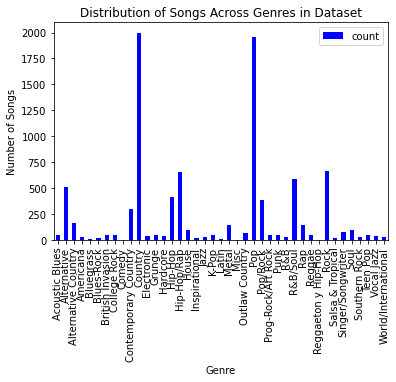

In [ ]:
#Data for distribution of genres.
df_final.groupby('genre').decade.agg(['count']).head(50).plot(kind ='bar',color='b')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.legend()
plt.title('Distribution of Songs Across Genres in Dataset')

In [ ]:
#Uneven dist of genres across decades
l_df = df_final.groupby(['genre', 'decade']).size().head(10000)
l_df

genre                decade
Acoustic Blues       2000s     17
                     2010s     29
Alternative          1960s      3
                     1970s     14
                     1980s     26
                               ..
Vocal Jazz           1990s     14
                     2000s     14
                     2010s     11
World/International  2000s      2
                     2010s     25
Length: 149, dtype: int64

Text(0.5, 1.0, 'Trend for explicit rating over time')

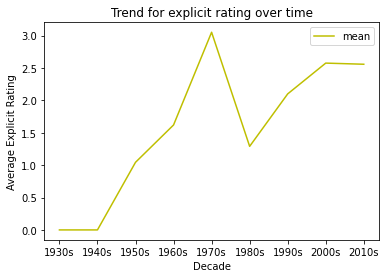

In [ ]:
#Trend for explicit rating over time
l_df = df_final.groupby('decade').explicit_rating.agg(['mean']).head(10).plot(color='y')
plt.xlabel('Decade')
plt.ylabel('Average Explicit Rating')
plt.legend()
plt.title('Trend for explicit rating over time')

Text(0.5, 1.0, 'Comparing Explicit Ratings across Genres')

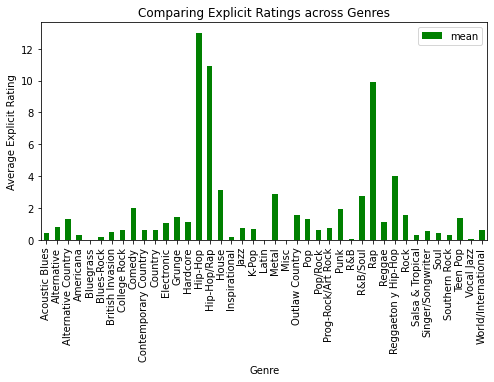

In [ ]:
#Trend for explicit rating for genres
l_df = df_final.groupby('genre').explicit_rating.agg(['mean']).head(50).plot(kind ='bar',color='g',figsize=(8,4))
plt.xlabel('Genre')
plt.ylabel('Average Explicit Rating')
plt.legend()
plt.title('Comparing Explicit Ratings across Genres')

In [ ]:
#Average polarity of songs by genre for 5 most common genres
import matplotlib.pyplot as plt
df_final.groupby('genre').polarity.agg(['count','mean']).sort_values(['count','mean'],ascending=[False,True]).head()

,count,mean
genre,,
Country,2072,0.123452
Pop,2065,0.129113
Rock,958,0.089633
Hip-Hop/Rap,826,0.027844
R&B/Soul,674,0.135919


Text(0.5, 1.0, 'Average Lyrics Polarity for Genres')

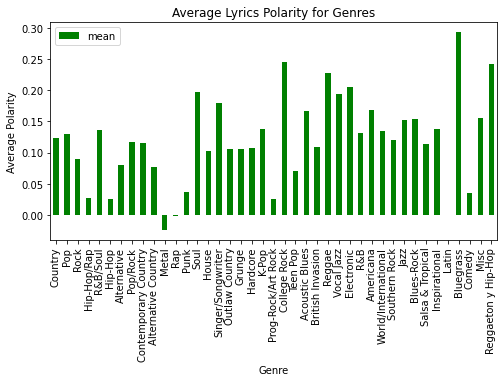

In [ ]:
#Average polarity of songs by Genre
import matplotlib.pyplot as plt
l_df = df_final.groupby('genre').polarity.agg(['count','mean']).sort_values(['count','mean'],ascending=[False,True]).head(50)
l_df2 = l_df.T
l_df3 = l_df2.drop(['count'])
l_df3.T.plot(kind ='bar',color='g',figsize=(8,4))
plt.xlabel('Genre')
plt.ylabel('Average Polarity')
plt.legend()
plt.title('Average Lyrics Polarity for Genres')

In [ ]:
#Average pos/neg/neu polarity of songs across Genre
(
    df_final.groupby (['genre'])[['positive','negative']]
 .agg({'positive':'mean', 'negative':'mean'})
 .plot (kind='bar',figsize=(20,10))
)
plt.xlabel('Genre')
plt.ylabel('Polarity')
plt.legend()
plt.title('Polarity across Genres')


Text(0.5, 1.0, 'Trend of polarity over the decades')

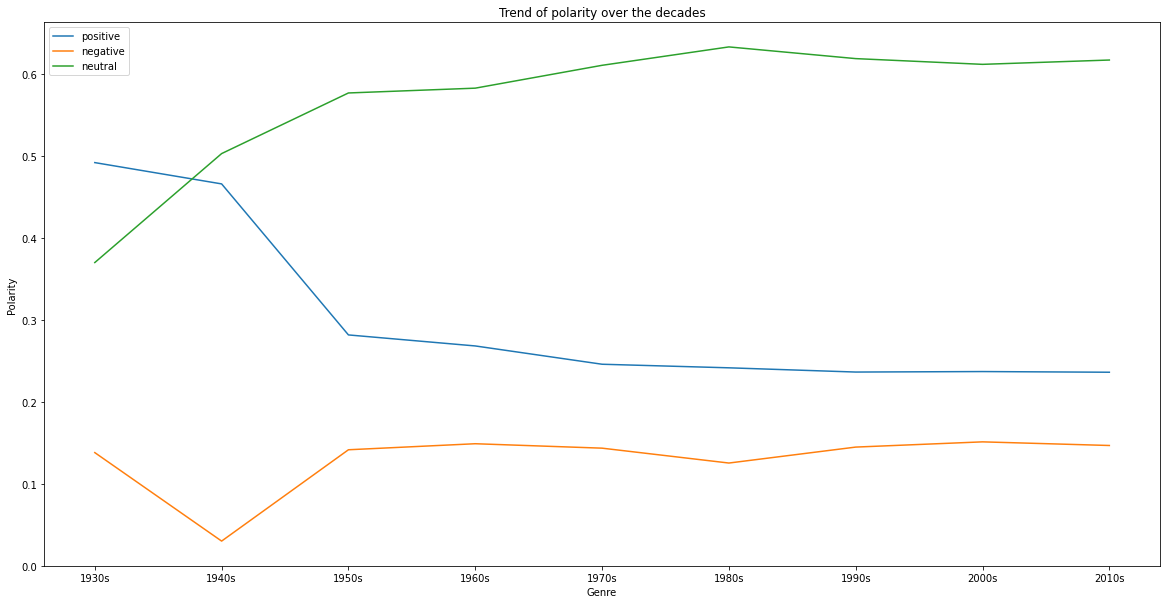

In [ ]:
#Average pos/neg/neu polarity of songs across time
(
    df_final.groupby (['decade'])[['positive','negative','neutral']]
 .agg({'positive':'mean', 'negative':'mean','neutral':'mean'})
 .plot (figsize=(20,10))
)
plt.xlabel('Genre')
plt.ylabel('Polarity')
plt.legend()
plt.title('Trend of polarity over the decades')

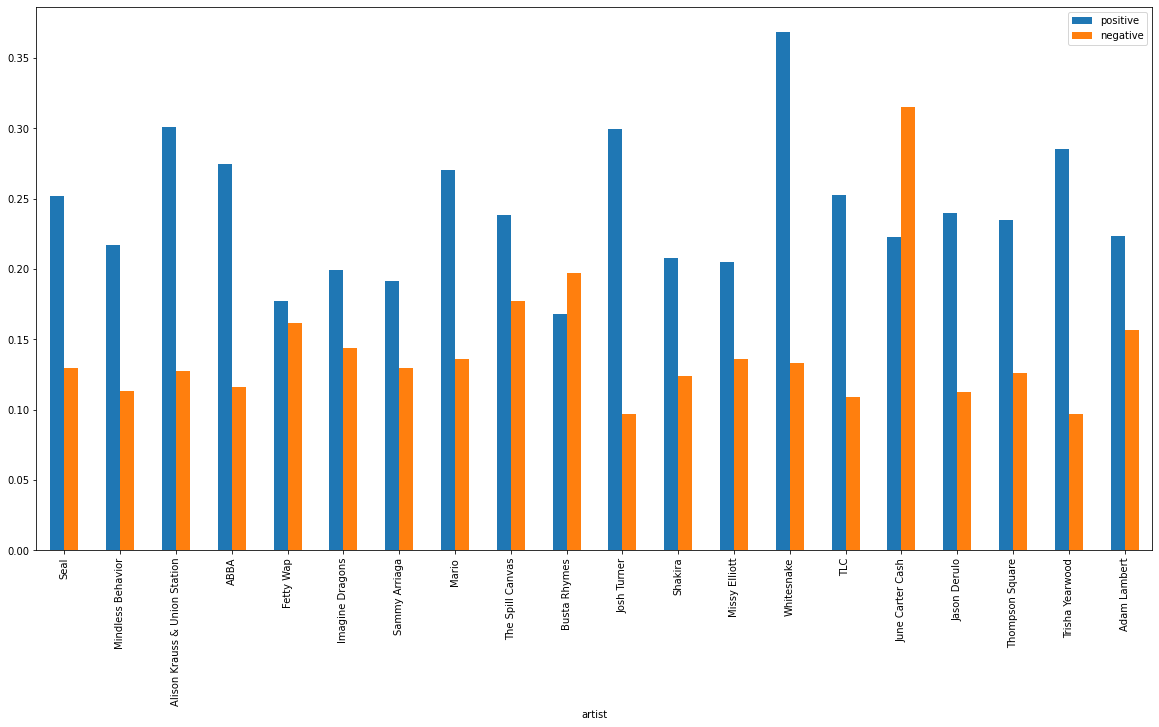

In [ ]:
#Average pos/neg/neu polarity of songs by Artist
(
    df_final.groupby (['artist'])[['positive','negative']]
 .agg({'positive':'mean', 'negative':'mean'})
 .sample(20)
 .plot (kind='bar',figsize=(20,10))
)

In [ ]:
#Average polarity of songs by top 5 artist
import matplotlib.pyplot as plt
l_df = (
    df_final.groupby('artist').polarity
    .agg(['count','mean']).
    sort_values(['count','mean'],ascending=[False,True])
    .head(20))
# l_df2 = l_df.T
# l_df3 = l_df2.drop(['count'])
# l_df3.T.plot(kind='bar', ax=ax, color = 'y')
# plt.xlabel('Artist')
# plt.ylabel('Average Polarity')
# plt.legend()
# ax.legend(["Mean Polarity"])
# plt.title('Average Lyrics Polarity for Top 20 Occuring Artists')

In [ ]:
#Negative Polarity and Profanity Relation
(
    df_final.groupby (['artist'])[['polarity','explicit_rating']]
 .agg({'polarity':'mean', 'explicit_rating':'mean'})
 .sort_values('polarity', ascending=True)
)


,polarity,explicit_rating
artist,,
Ke$hawn,-0.201528,12.500000
Ice Cube,-0.065259,13.100000
The Game,-0.052246,15.400000
Slipknot,-0.051294,5.224490
PnB Rock,-0.046471,10.906977
...,...,...
Michael Bolton,0.263604,0.058824
Andrea Bocelli,0.268828,0.750000
Alison Krauss & Union Station,0.293050,0.000000


Text(0.5, 1.0, 'Average Lyrics Polarity for Occuring Artists')

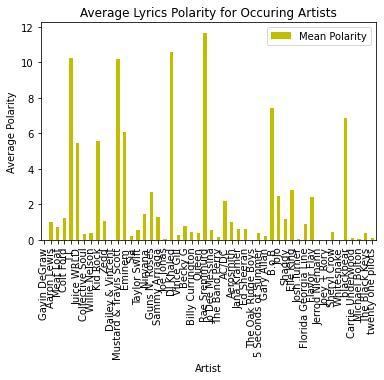

In [ ]:
#Average Profanity of songs by artists
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#l_df = df_final.groupby('artist').polarity.agg(['count','mean']).sort_values(['count','mean'],ascending=[False,True]).head(20)
m_df = df_final.groupby('artist').explicit_rating.agg(['mean']).sample().plot(kind='bar', ax=ax, color = 'y')
plt.xlabel('Artist')
plt.ylabel('Average Polarity')
plt.legend()
ax.legend(["Mean Polarity"])
plt.title('Average Lyrics Polarity for Occuring Artists')

Text(0.5, 1.0, 'Performance of NLTK Model : Neutral/Non-neutral Polarity')

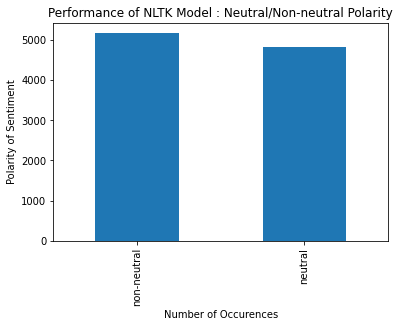

In [ ]:
#Performance of NLTK in classifying Neutral/Non-Neutral
df_final['NLTK Class'].value_counts().plot(kind='bar')
plt.xlabel('Number of Occurences')
plt.ylabel('Polarity of Sentiment')
plt.title('Performance of NLTK Model : Neutral/Non-neutral Polarity')

Text(0.5, 1.0, 'Performance of NLTK Model : Positive/Negative/Neutral Polarity')

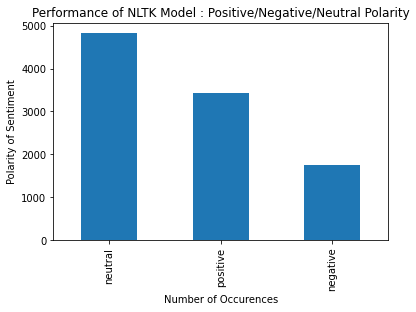

In [ ]:
#Performance of NLTK in classifying Positive/Negative/Neutral
df_final['SI Score'].value_counts().plot(kind='bar')
plt.xlabel('Number of Occurences')
plt.ylabel('Polarity of Sentiment')
plt.title('Performance of NLTK Model : Positive/Negative/Neutral Polarity')

In [ ]:
l_df = df_final.groupby('genre') #.agg(['count']).sort_values(['count'],ascending=[False,True]).head()
means_df = l_df[]

In [ ]:
#Results for Textblob
df_final['blob_score'].value_counts()

positive    7191
negative    2810
Name: blob_score, dtype: int64

In [ ]:
#Results for NLTK
df_final['NLTK Class'].value_counts()

non-neutral    5172
neutral        4829
Name: NLTK Class, dtype: int64

In [ ]:
#Results for NLTK_SI
df_final['SI Score'].value_counts()

neutral     4829
positive    3429
negative    1743
Name: SI Score, dtype: int64

In [ ]:
# # Save the data into a csv file
# df_final.to_csv('train_data.csv',index=False)

In [ ]:
y_pred_blob= list(df_final['blob_score'])
y_pred_nltk = list(df_final['SI Score'])

In [ ]:
senti = {'positive': 2,'neutral': 1,'negative':3, 'nan': 0}
for item in range(len(y_pred_blob)):
  try:
    y_pred[item] = senti[str(y_pred[item])] 
  except:
    print(item)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print('Matrix: ',confusion_matrix(y_df, y_pred))
print('accuracy: ' + str(accuracy_score(y_df, y_pred)))
print('F1 Score: '+ str(f1_score(y_df, y_pred, average='macro')))